In [7]:
import pandas as pd
housing= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
housing.info()
print(housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

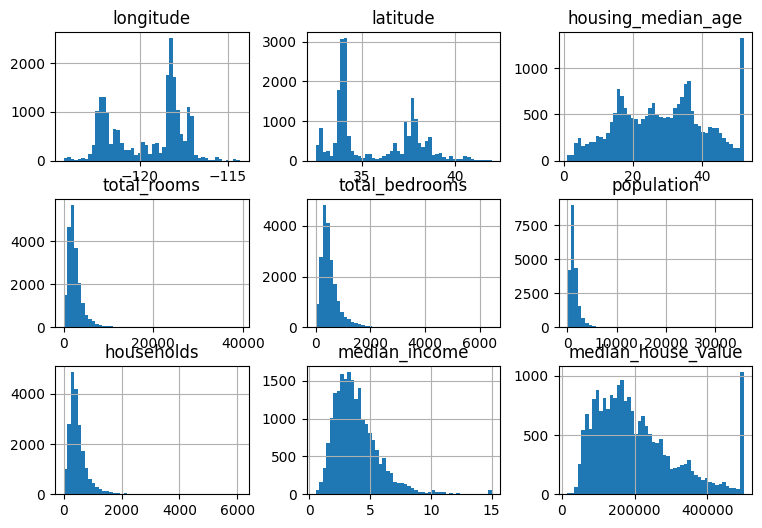

In [9]:
housing.hist(
             bins=50, figsize=(9,6))


In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  households  median_income  media

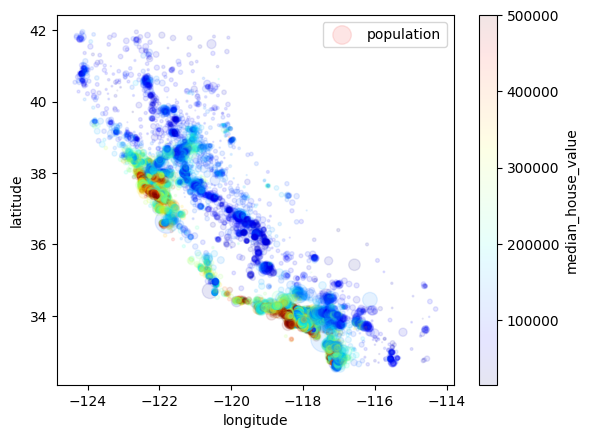

In [15]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.1,
             s=housing["population"]/100,
             label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),

             colorbar=True)

plt.legend()
plt.show()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


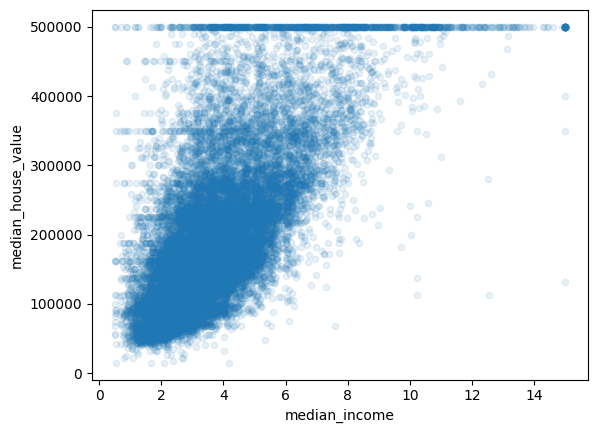

In [17]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()


In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
housing_num_imputed = imputer.transform(housing_num)
print(housing_num_imputed)


[[-122.23         37.88         41.         ...    6.98412698
     0.14659091    2.55555556]
 [-122.22         37.86         21.         ...    6.23813708
     0.15579659    2.10984183]
 [-122.24         37.85         52.         ...    8.28813559
     0.12951602    2.80225989]
 ...
 [-121.22         39.43         17.         ...    5.20554273
     0.21517303    2.3256351 ]
 [-121.32         39.43         18.         ...    5.32951289
     0.21989247    2.12320917]
 [-121.24         39.37         16.         ...    5.25471698
     0.22118492    2.61698113]]


In [24]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)

print(housing_cat_1hot)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>
  Coords	Values
  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (20615, 1)	1.0
  (20616, 1)	1.0
  (20617, 1)	1.0
  (20618, 1)	1.0
  (20619, 1)	1.0
  (20620, 1)	1.0
  (20621, 1)	1.0
  (20622, 1)	1.0
  (20623, 1)	1.0
  (20624, 1)	1.0
  (20625, 1)	1.0
  (20626, 1)	1.0
  (20627, 1)	1.0
  (20628, 1)	1.0
  (20629, 1)	1.0
  (20630, 1)	1.0
  (20631, 1)	1.0
  (20632, 1)	1.0
  (20633, 1)	1.0
  (20634, 1)	1.0
  (20635, 1)	1.0
  (20636, 1)	1.0
  (20637, 1)	1.0
  (20638, 1)	1.0
  (20639, 1)	1.0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num_imputed)
print(housing_scaled)

[[-1.32783522  1.05254828  0.98214266 ...  0.62855945 -1.14993031
  -0.04959654]
 [-1.32284391  1.04318455 -0.60701891 ...  0.32704136 -0.99038135
  -0.09251223]
 [-1.33282653  1.03850269  1.85618152 ...  1.15562047 -1.44586501
  -0.02584253]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.09031802  0.03870567
  -0.0717345 ]
 [-0.87362627  1.77823747 -0.84539315 ... -0.04021111  0.12050112
  -0.09122515]
 [-0.83369581  1.75014627 -1.00430931 ... -0.07044252  0.14290124
  -0.04368215]]


In [29]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                         population_per_household]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)


[[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]
